In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("/content/drive/My Drive/final1.csv")

In [5]:
df.head()

Spine_image  L1_grade  ...  principal component 5  y
0    image001         1  ...             -24.724990  0
1    image002         0  ...            -236.564452  0
2    image003         1  ...             -60.440237  0
3    image004         0  ...             -33.238924  0
4    image005         1  ...              14.669335  0

[5 rows x 17 columns]

In [6]:
df2 = df

In [7]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df2["Spine_image"] = l.fit_transform(df2["Spine_image"])

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical

Using TensorFlow backend.


In [9]:
X = df.drop(["y"],axis=1)
y = df["y"]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.3, random_state=3)

In [ ]:
classifier = Sequential()

classifier.add(Dense(output_dim=10, init='uniform', activation='relu', input_dim=17))

classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

history = classifier.fit(X_train, y_train, batch_size=1, epochs=100, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=17, units=10, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


Epoch 1/100
10/10 [==============================] - 2s 179ms/step - loss: 0.9500 - accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.7536 - accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5902 - accuracy: 0.7000
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4966 - accuracy: 0.7000
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4336 - accuracy: 0.8000
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3902 - accuracy: 0.8000
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3564 - accuracy: 0.8000
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3318 - accuracy: 0.8000
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3162 - accuracy: 0.9000
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3026 - accuracy: 0.9000
Epoch 1

In [ ]:
X_test

Spine_image  L1_grade  ...  principal component 5  y
12           12         1  ...            -112.833504  1
4             4         1  ...              14.669335  0
1             1         0  ...            -236.564452  0
6             6         3  ...              95.422477  1
2             2         1  ...             -60.440237  0

[5 rows x 17 columns]

In [ ]:
classifier.predict_classes(X_test)

array([[1],
       [0],
       [0],
       [1],
       [1]], dtype=int32)

In [12]:
!pip install pgmpy

     |████████████████████████████████| 348kB 15.4MB/s 


In [13]:
import pandas as pd
import numpy as np
from pgmpy.estimators import HillClimbSearch, BicScore

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
est = HillClimbSearch(df2, scoring_method=BicScore(df2))
best_model = est.estimate()
sorted(best_model.nodes())

['L1_case',
 'L1_grade',
 'L2_case',
 'L2_grade',
 'L3_case',
 'L3_grade',
 'L4_case',
 'L4_grade',
 'L5_case',
 'L5_grade',
 'Spine_image',
 'principal component 1',
 'principal component 2',
 'principal component 3',
 'principal component 4',
 'principal component 5',
 'y']

In [ ]:
best_model.edges()

OutEdgeView([('L2_case', 'L2_grade'), ('L2_case', 'L1_case'), ('L5_grade', 'L5_case')])

In [ ]:
#search a model with restriction on the number of parents:
est.estimate(max_indegree=1).edges()

OutEdgeView([('L2_case', 'L2_grade'), ('L2_case', 'L1_case'), ('L5_grade', 'L5_case')])

In [14]:
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator

In [ ]:
df2.head()

Spine_image  L1_grade  ...  principal component 5  y
0            0         1  ...             -24.724990  0
1            1         0  ...            -236.564452  0
2            2         1  ...             -60.440237  0
3            3         0  ...             -33.238924  0
4            4         1  ...              14.669335  0

[5 rows x 17 columns]

In [ ]:
#model = BayesianModel([('L1_grade', 'principal component 1'), ('L2_grade', 'principal component 1'),
#                      ('L3_grade', 'principal component 1'), ('L4_grade', 'principal component 1'),
#                      ('L5_grade', 'principal component 1'), ('L1_grade', 'principal component 2'),
#                       ('L2_grade', 'principal component 2'), ('L3_grade', 'principal component 2'),
#                       ('L4_grade', 'principal component 2'), ('L5_grade', 'principal component 2'),
#                       ('L1_grade', 'principal component 3'), ('L2_grade', 'principal component 3'),
#                       ('L3_grade', 'principal component 3'), ('L4_grade', 'principal component 3'),
#                       ('L5_grade', 'principal component 3'), ('L1_grade', 'principal component 4'),
#                       ('L2_grade', 'principal component 4'), ('L3_grade', 'principal component 4'),
#                       ('L4_grade', 'principal component 4'), ('L5_grade', 'principal component 4'),
#                       ('L1_grade', 'principal component 5'), ('L2_grade', 'principal component 5'),
#                       ('L3_grade', 'principal component 5'), ('L4_grade', 'principal component 5'),
#                      ('L5_grade', 'principal component 5'), ('Spine_image', 'principal component 1'),
#                       ('Spine_image', 'principal component 2'), ('Spine_image', 'principal component 3'),
#                      ('Spine_image', 'principal component 4'), ('Spine_image', 'principal component 5'),
#                       ('Spine_image', 'L1_grade'), ('Spine_image', 'L2_grade'), ('Spine_image', 'L3_grade'),
#                       ('Spine_image', 'L4_grade'), ('Spine_image', 'L5_grade'), ('principal component 1','y'),
#                       ('principal component 2','y'), ('principal component 3','y'), ('principal component 4','y'),
#                       ('principal component 5','y'), ('L1_grade','y'), ('L2_grade','y'), ('L3_grade','y'), ('L4_grade','y'),
#                      ('L5_grade','y')])

In [22]:
model = BayesianModel([('L1_grade', 'principal component 1'), ('L2_grade', 'principal component 2'),
                     ('L3_grade', 'principal component 3'), ('L4_grade', 'principal component 4'),
                      ('L5_grade', 'principal component 5'), ('Spine_image', 'L1_grade'), ('principal component 1','y'),
                      ('principal component 2','y'), ('principal component 3','y'), ('principal component 4','y'), 
                       ('principal component 5','y'), ('Spine_image', 'L2_grade'), ('Spine_image', 'L3_grade'), 
                       ('Spine_image', 'L4_grade'), ('Spine_image', 'L5_grade')])

In [23]:
df2_train, df2_test, y_train, y_test = train_test_split(df2, y, test_size=0.3, random_state=3)

In [24]:
model.fit(df2, estimator = BayesianEstimator)

In [25]:
df2

Spine_image  L1_grade  ...  principal component 5  y
0             0         1  ...             -24.724990  0
1             1         0  ...            -236.564452  0
2             2         1  ...             -60.440237  0
3             3         0  ...             -33.238924  0
4             4         1  ...              14.669335  0
5             5         0  ...              -0.139423  1
6             6         3  ...              95.422477  1
7             7         1  ...              51.459336  0
8             8         3  ...             110.557724  1
9             9         2  ...             131.698012  1
10           10         1  ...             -31.607538  1
11           11         0  ...            -159.973306  1
12           12         1  ...            -112.833504  1
13           13         1  ...             509.313026  0
14           14         0  ...            -253.597537  1

[15 rows x 17 columns]

In [26]:
df2_test

Spine_image  L1_grade  ...  principal component 5  y
12           12         1  ...            -112.833504  1
4             4         1  ...              14.669335  0
1             1         0  ...            -236.564452  0
6             6         3  ...              95.422477  1
2             2         1  ...             -60.440237  0

[5 rows x 17 columns]

In [27]:
model.nodes()

NodeView(('L1_grade', 'principal component 1', 'L2_grade', 'principal component 2', 'L3_grade', 'principal component 3', 'L4_grade', 'principal component 4', 'L5_grade', 'principal component 5', 'Spine_image', 'y'))

In [29]:
model.edges()

OutEdgeView([('L1_grade', 'principal component 1'), ('principal component 1', 'y'), ('L2_grade', 'principal component 2'), ('principal component 2', 'y'), ('L3_grade', 'principal component 3'), ('principal component 3', 'y'), ('L4_grade', 'principal component 4'), ('principal component 4', 'y'), ('L5_grade', 'principal component 5'), ('principal component 5', 'y'), ('Spine_image', 'L1_grade'), ('Spine_image', 'L2_grade'), ('Spine_image', 'L3_grade'), ('Spine_image', 'L4_grade'), ('Spine_image', 'L5_grade')])

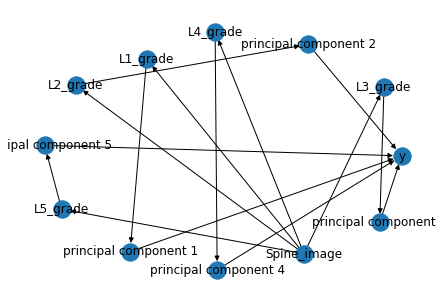

In [32]:
import networkx as nx
import pylab as plt
nx.draw(model, with_labels=True)
plt.show()

In [28]:
model.predict(df2_test.drop(['y','L1_case','L2_case','L3_case','L4_case','L5_case'],axis=1))

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


y
0  1
1  0
2  0
3  1
4  0